In [1]:
from cis_requests import *
import os
import pandas as pd

In [80]:
all_data = []
failures = []
count = 0
for root, dirs, files in os.walk(r"C:\Users\mkreisel\training_data", topdown=False):
    for file in files:
        path = os.path.join(root, file)
        extension = path.split('.')[-1]
        label = path.split("""\\""")[-2]
        name = path.split("""\\""")[-1]
        data = {'file_name': name, 'label': label}
        if extension == 'txt':
            with open(path, 'r') as f:
                try:
                    text = f.read()
                    pred = deep_detect_classify(text, threshold = 0.01)
                    data['prediction'] = pred['cat']
                    data['prob'] = pred['prob']
                    all_data.append(data)
                except:
                    failures.append(path)
        count += 1
        if count % 2000 == 0:
            break
    if count % 2000 == 0:
            break

In [81]:
df = pd.DataFrame.from_records(all_data)

In [82]:
df.to_csv(r"C:\Users\mkreisel\deep_detect_predictions.csv")

In [90]:
import numpy as np
df['correct'] = df['label'] == df['prediction']
df = df[~df['file_name'].str.contains("-description") & ~df['file_name'].str.contains("-guidance")]

In [91]:
np.mean(df[df['prob'] > 0.1]['correct'])

0.8071808510638298

In [94]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(df['correct'], df['prob'])
coverages = []
for t in thresholds:
    coverages.append(df[df['prob'] > t].count()['file_name'] / df.count()['file_name'])

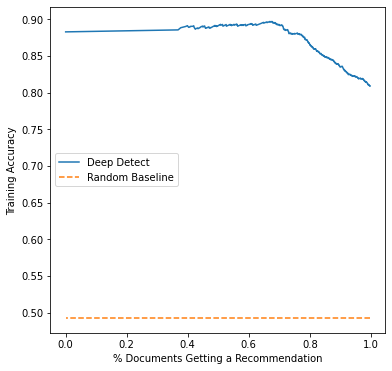

In [95]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(coverages, precision[0:-1], label='Deep Detect')
baseline = df.groupby('label').count().max()['file_name'] / df.count()['file_name']
ax.set_xlabel('% Documents Getting a Recommendation')
ax.set_ylabel('Training Accuracy')
ax.plot([coverages[0], coverages[-1]], [baseline, baseline], linestyle='--', label='Random Baseline')
ax.legend(loc='center left')

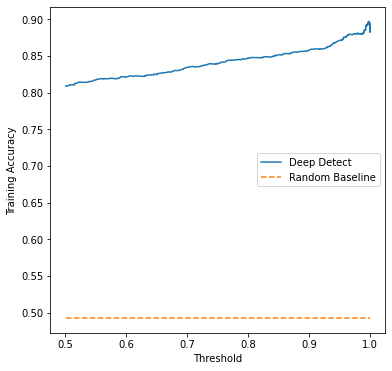

In [96]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(thresholds, precision[0:-1], label='Deep Detect')
baseline = df.groupby('label').count().max()['file_name'] / df.count()['file_name']
ax.set_xlabel('Threshold')
ax.set_ylabel('Training Accuracy')
ax.plot([thresholds[0], thresholds[-1]], [baseline, baseline], linestyle='--', label='Random Baseline')
ax.legend(loc='center right')